# Exercício - Agrupamento
### Autor: Alexandre Marcondes


* Refaça a analise do exercicio de classificacao supervisionada, incluindo o PCA.
* Plote a curva explained_variance_ratio para encontrar uma quantidade de componentes que explique perto de 90% da variancia
---

### Bibliotecas

In [11]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
# from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans

### Dados

In [24]:
drivers = pd.read_csv('vigencias_scores.csv')
drivers.columns

Index(['id_vei', 'id_uo_vei', 'id_motorista', 'id_uo_motorista',
       'distancia_percorrida_km', 'qtd_banguela', 'qtd_curvas',
       'qtd_aceleracoes', 'qtd_frenagens', 'qtd_vel_faixa_1',
       'qtd_vel_faixa_2', 'qtd_vel_faixa_3', 'tempo_vel_faixa_1',
       'tempo_vel_faixa_2', 'tempo_vel_faixa_3', 'qtd_vel_via_faixa_1',
       'qtd_vel_via_faixa_2', 'qtd_vel_via_faixa_3', 'tempo_vel_via_faixa_1',
       'tempo_vel_via_faixa_2', 'tempo_vel_via_faixa_3',
       'qtd_manuseio_celular', 'qtd_fadiga_motorista',
       'qtd_distracao_motorista', 'qtd_uso_cigarro', 'score_geral', 'rank'],
      dtype='object')

In [28]:
drivers = drivers.drop(['id_uo_vei','id_vei','id_uo_motorista','id_motorista','score_geral'],axis=1)
drivers.shape

(12642, 22)

In [30]:
drivers.head()

,distancia_percorrida_km,qtd_banguela,qtd_curvas,qtd_aceleracoes,qtd_frenagens,qtd_vel_faixa_1,qtd_vel_faixa_2,qtd_vel_faixa_3,tempo_vel_faixa_1,tempo_vel_faixa_2,...,qtd_vel_via_faixa_2,qtd_vel_via_faixa_3,tempo_vel_via_faixa_1,tempo_vel_via_faixa_2,tempo_vel_via_faixa_3,qtd_manuseio_celular,qtd_fadiga_motorista,qtd_distracao_motorista,qtd_uso_cigarro,rank
0,234.420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,208.0,0.0,1456.0,0.0,0.0,0.0,0.0,ruim
1,114.083,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,regular
2,183.725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,otimo
3,702.525,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,otimo
4,175.290,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bom


In [31]:
y = drivers.loc[:,'rank']
X = drivers.drop(['rank'],axis=1)
print(y.shape)
print(X.shape)

(12642,)
(12642, 21)


### Classificação utilizando Kmeans

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[  90   70    1   16    5]
 [  24 1557    0    6    0]
 [   3    0   21    1   85]
 [  54   48    1   80   25]
 [  15    3   23   28  373]]
              precision    recall  f1-score   support

         bom       0.48      0.49      0.49       182
       otimo       0.93      0.98      0.95      1587
     pessimo       0.46      0.19      0.27       110
     regular       0.61      0.38      0.47       208
        ruim       0.76      0.84      0.80       442

    accuracy                           0.84      2529
   macro avg       0.65      0.58      0.60      2529
weighted avg       0.82      0.84      0.82      2529



### Classificação com PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(8)
pca.fit(X)
XPCA = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(XPCA,y, test_size=0.2)

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[  81   89    0   19    6]
 [  39 1512    0    9    1]
 [   6    1   19    3   94]
 [  31   85    1   34   22]
 [  15    3   31   31  397]]
              precision    recall  f1-score   support

         bom       0.47      0.42      0.44       195
       otimo       0.89      0.97      0.93      1561
     pessimo       0.37      0.15      0.22       123
     regular       0.35      0.20      0.25       173
        ruim       0.76      0.83      0.80       477

    accuracy                           0.81      2529
   macro avg       0.57      0.51      0.53      2529
weighted avg       0.77      0.81      0.79      2529



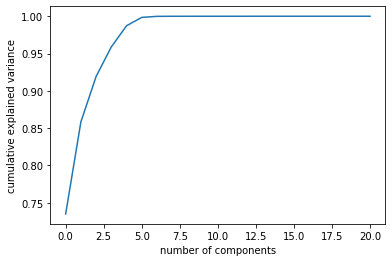

In [34]:
pca = PCA().fit(drivers.drop(['rank'],axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

O número de features é aproximadamente 8. Mais features podem ser utilizadas, porém não terá tanta influência na acurácia obtida pelo modelo.

### Criação de pipeline com PCA

In [60]:
#  Divisão em dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

pca = PCA()
tree = DecisionTreeClassifier()

# Criação da pipeline
pipe_tree = Pipeline(steps=[('pca', pca),  # Redução de dimensão
                            ('tree', tree)  # Algoritmo classificador
                           ],
                     verbose=False
                    )

#  Fit do modelo com a pipeline criada
# pipe_tree.fit(X_train,y_train)
#  Predição do modelo
# y_pred = pipe_tree.predict(X_test)

#  Grid search
tree_criterion_list = ['gini','entropy']
tree_depth_list = list(range(0,30))
pca_components_list = list(range(0,15))

params = {'pca__n_components':pca_components_list,
          'tree__criterion':tree_criterion_list,
          'tree__max_depth':tree_depth_list}

clf = GridSearchCV(estimator=pipe_tree,
                   param_grid=params,
                   verbose=0,
                   n_jobs=-1)

clf.fit(X_train,y_train)

print('Best Criterion:', clf.best_estimator_.get_params()['tree__criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['tree__max_depth'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

Best Criterion: gini
Best max_depth: 21
Best Number Of Components: 14


In [61]:
y_pred = clf.predict(X_test)
#  Exibição dos resultados
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 145   37    1   17    7]
 [  39 1487    0    1    1]
 [   2    0   79    2   27]
 [  24    9    2  117   19]
 [   9    4   22   29  449]]
              precision    recall  f1-score   support

         bom       0.66      0.70      0.68       207
       otimo       0.97      0.97      0.97      1528
     pessimo       0.76      0.72      0.74       110
     regular       0.70      0.68      0.69       171
        ruim       0.89      0.88      0.88       513

    accuracy                           0.90      2529
   macro avg       0.80      0.79      0.79      2529
weighted avg       0.90      0.90      0.90      2529

